# Pandas:
## data structures, IO, aggregation, melt/pivot, group operations, merge/join

this basically covers the concepts you need to master with Pandas

Author: [Alexandre Gramfort](http://alexandre.gramfort.net)

(based on Wes McKinney's book "Python for Data Analysis" O'REILLY,
and the pandas materials from Joris Van den Bossche and Stijn Van Hoey.)

Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)

In [1]:
import pandas as pd  # THE standard way of importing pandas

Some imports

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-colorblind")

C:\Users\pasqu\AppData\Local\Temp\ipykernel_1404\3272007734.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# Data structures

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [3]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

In [4]:
type(s)

pandas.core.series.Series

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [5]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [6]:
s.values

array([0.1, 0.2, 0.3, 0.4])

In [7]:
type(s.values)

numpy.ndarray

We can access series values via the index, just like for NumPy arrays:

In [8]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [9]:
s2 = pd.Series(np.arange(4), index=["a", "b", "c", "d"])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [10]:
s2["c"]

2

### Pandas Series versus dictionaries

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [11]:
pop_dict = {
    "Germany": 81.3,
    "Belgium": 11.3,
    "France": 64.3,
    "United Kingdom": 64.9,
    "Netherlands": 16.9,
}
population = pd.Series(pop_dict)
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

We can index the populations like a dict as expected:

In [12]:
population["France"]

64.3

but with the power of numpy arrays:

In [13]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="img/schema-dataframe.svg" width=50%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [14]:
data = {
    "country": ["Belgium", "France", "Germany", "Netherlands", "United Kingdom"],
    "population": [11.3, 64.3, 81.3, 16.9, 64.9],
    "area": [30510, 671308, 357050, 41526, 244820],
    "capital": ["Brussels", "Paris", "Berlin", "Amsterdam", "London"],
}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [15]:
type(countries["area"])

pandas.core.series.Series

### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [16]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [18]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [19]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [20]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

To access a Series representing a column in the data, use typical indexing syntax:

In [21]:
countries["area"]

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64

### Changing the DataFrame index

If we don't like what the index looks like, we can reset it and set one of our columns:

In [22]:
countries = countries.set_index("country")
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Reversing this operation, is `reset_index`:

In [23]:
countries.reset_index("country")

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


## Some useful methods on these data structures

Exploration of the Series and DataFrame is essential (check out what you're dealing with). 

In [24]:
countries.head(4)  # Top rows

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam


In [25]:
countries.tail(4)  # Bottom rows

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [26]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


**Sort**ing your data **by** a specific column is another important first-check:

In [27]:
countries.sort_values(by="population")

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
Netherlands,16.9,41526,Amsterdam
France,64.3,671308,Paris
United Kingdom,64.9,244820,London
Germany,81.3,357050,Berlin


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values</li>
    </ul>
</div>

In [28]:
countries.sort_values(by="population", ascending=False)

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London
France,64.3,671308,Paris
Netherlands,16.9,41526,Amsterdam
Belgium,11.3,30510,Brussels


The **`plot`** method can be used to quickly visualize the data in different ways:

<AxesSubplot: xlabel='country'>

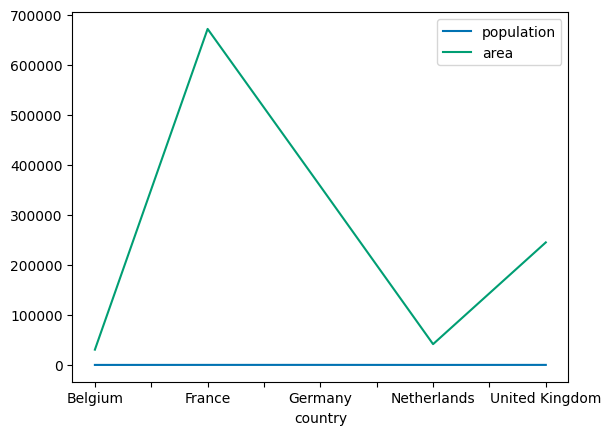

In [29]:
countries.plot()

However, for this dataset, it does not say that much:

In [30]:
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


<AxesSubplot: ylabel='country'>

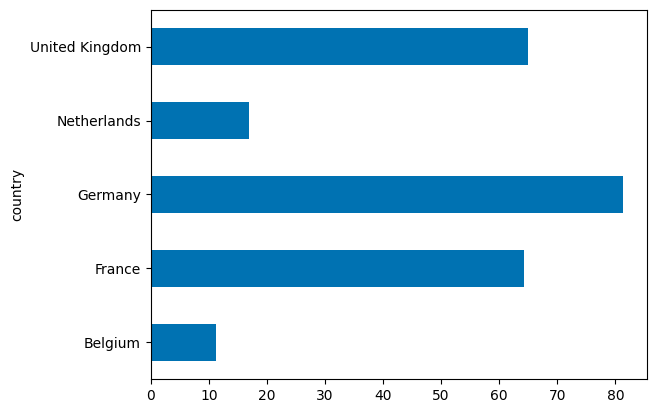

In [31]:
countries["population"].plot(kind="barh")

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>You can play with the `kind` keyword of the `plot` function in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'</li>
    </ul>
</div>

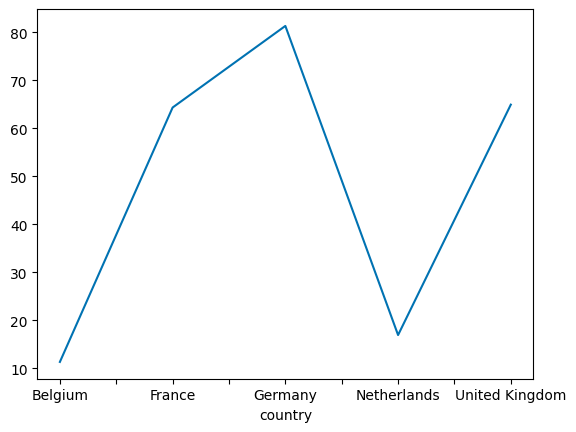

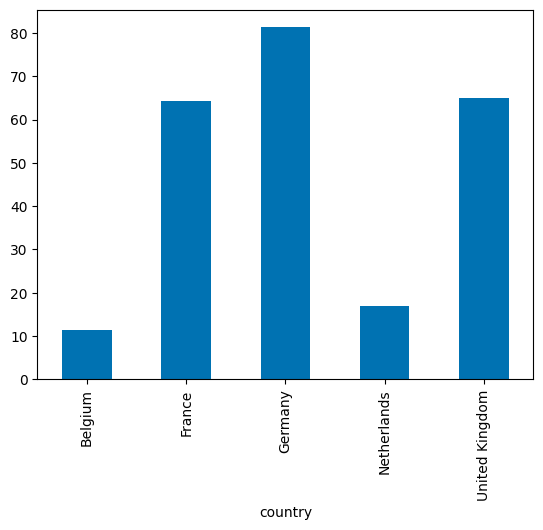

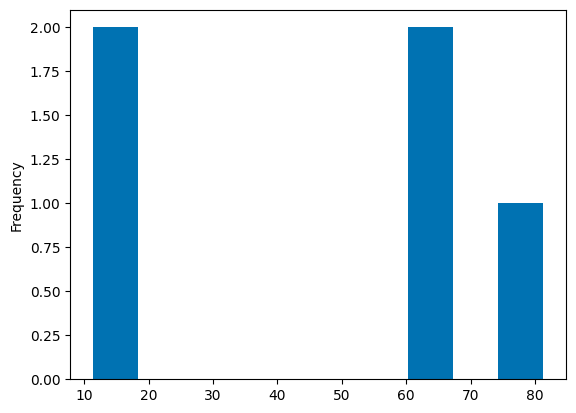

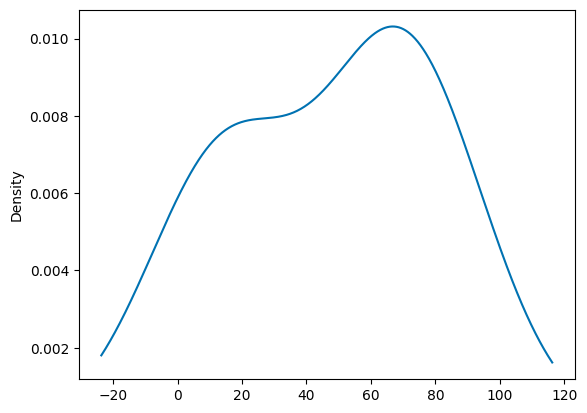

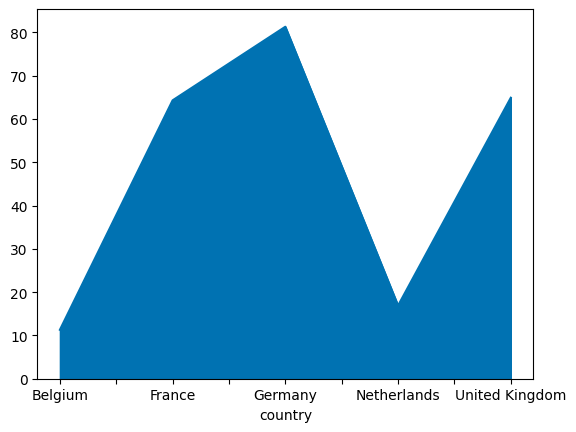

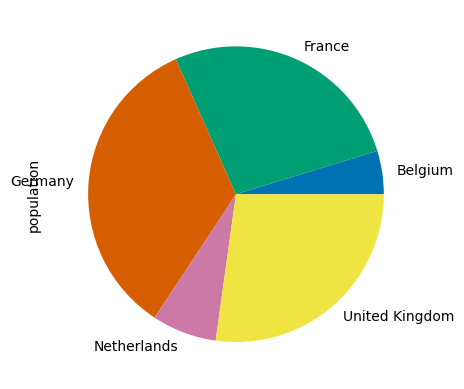

In [32]:
for feature in ["line", "bar", "hist", "density", "area", "pie"]:
    countries["population"].plot(kind=feature)
    plt.show()

<AxesSubplot: xlabel='area', ylabel='population'>

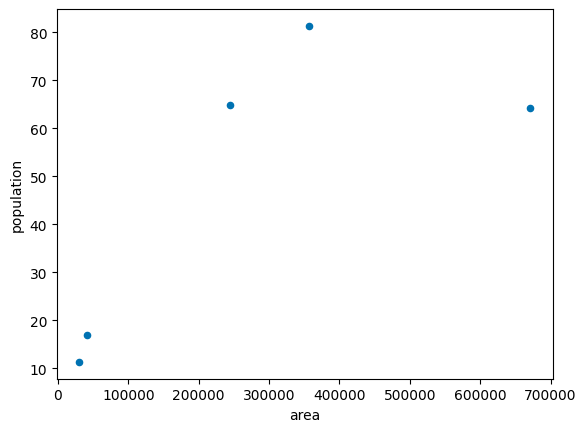

In [33]:
countries.plot(kind="scatter", x="area", y="population")

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [34]:
countries.to_dict()

{'population': {'Belgium': 11.3,
  'France': 64.3,
  'Germany': 81.3,
  'Netherlands': 16.9,
  'United Kingdom': 64.9},
 'area': {'Belgium': 30510,
  'France': 671308,
  'Germany': 357050,
  'Netherlands': 41526,
  'United Kingdom': 244820},
 'capital': {'Belgium': 'Brussels',
  'France': 'Paris',
  'Germany': 'Berlin',
  'Netherlands': 'Amsterdam',
  'United Kingdom': 'London'}}

##  Basic operations on Series and DataFrames

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

In [35]:
population = pd.Series(
    {
        "Germany": 81.3,
        "Belgium": 11.3,
        "France": 64.3,
        "United Kingdom": 64.9,
        "Netherlands": 16.9,
    }
)

countries = pd.DataFrame(
    {
        "country": ["Belgium", "France", "Germany", "Netherlands", "United Kingdom"],
        "population": [11.3, 64.3, 81.3, 16.9, 64.9],
        "area": [30510, 671308, 357050, 41526, 244820],
        "capital": ["Brussels", "Paris", "Berlin", "Amsterdam", "London"],
    }
)

In [36]:
countries.head()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# The 'new' concepts

## Elementwise-operations 

Just like with numpy arrays, many operations are element-wise:

In [37]:
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [38]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

In [39]:
density = countries["population"] / countries["area"]

In [40]:
density

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

In [41]:
np.log(countries["population"])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

which can be added as a new column, as follows:

In [42]:
countries["log_population"] = np.log(countries["population"])

In [43]:
countries.columns

Index(['country', 'population', 'area', 'capital', 'log_population'], dtype='object')

In [44]:
countries.head(3)

,country,population,area,capital,log_population
0,Belgium,11.3,30510,Brussels,2.424803
1,France,64.3,671308,Paris,4.163560
2,Germany,81.3,357050,Berlin,4.398146


In [45]:
countries["population"] > 40

0    False
1     True
2     True
3    False
4     True
Name: population, dtype: bool

<div class="alert alert-info">

<b>REMEMBER</b>:

<ul>
  <li>When you have an operation which does NOT work element-wise or you have no idea how to do it directly in Pandas, use the **apply()** function</li>
  <li>A typical use case is with a custom written or a **lambda** function</li>
</ul>
</div>

In [46]:
countries["population"].apply(np.log)  # but this works as well element-wise...

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

In [47]:
# in case you forgot the functionality: countries["capital"].str.len()
countries["capital"].apply(lambda x: len(x))

0    8
1    5
2    6
3    9
4    6
Name: capital, dtype: int64

In [48]:
def population_annotater(population):
    """annotate as large or small"""
    if population > 50:
        return "large"
    else:
        return "small"

In [49]:
countries["population"].apply(population_annotater)  # a custom user function

0    small
1    large
2    large
3    small
4    large
Name: population, dtype: object

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population numbers relative to France</li>
</ul>
</div>

In [50]:
countries.set_index("country", inplace=True)
countries["population_relative_France"] = (
    countries["population"] / countries["population"]["France"]
)
countries

,population,area,capital,log_population,population_relative_France
country,,,,,
Belgium,11.3,30510,Brussels,2.424803,0.175739
France,64.3,671308,Paris,4.163560,1.000000
Germany,81.3,357050,Berlin,4.398146,1.264386
Netherlands,16.9,41526,Amsterdam,2.827314,0.262830
United Kingdom,64.9,244820,London,4.172848,1.009331


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population density for each country and add this as a new column to the dataframe.</li>
</ul>
</div>

In [51]:
countries["density"] = countries["population"] / countries["area"] * 1e6
countries

,population,area,capital,log_population,population_relative_France,density
country,,,,,,
Belgium,11.3,30510,Brussels,2.424803,0.175739,370.370370
France,64.3,671308,Paris,4.163560,1.000000,95.783158
Germany,81.3,357050,Berlin,4.398146,1.264386,227.699202
Netherlands,16.9,41526,Amsterdam,2.827314,0.262830,406.973944
United Kingdom,64.9,244820,London,4.172848,1.009331,265.092721


<div class="alert alert-danger">

**WARNING**: **Alignment!** (unlike numpy)

 <ul>
  <li>Pay attention to **alignment**: operations between series will align on the index:  </li>
</ul> 

</div>

In [52]:
s1 = population[["Belgium", "France"]]
s2 = population[["France", "Germany"]]

In [53]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [54]:
s2

France     64.3
Germany    81.3
dtype: float64

In [55]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column). 

The average population number:

In [56]:
population.mean()

47.739999999999995

The minimum area:

In [57]:
countries["area"].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [58]:
countries.median()

C:\Users\pasqu\AppData\Local\Temp\ipykernel_1404\3048552938.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  countries.median()


population                        64.300000
area                          244820.000000
log_population                     4.163560
population_relative_France         1.000000
density                          265.092721
dtype: float64

## Pandas: Indexing and selecting data

In [59]:
population = pd.Series(
    {
        "Germany": 81.3,
        "Belgium": 11.3,
        "France": 64.3,
        "United Kingdom": 64.9,
        "Netherlands": 16.9,
    }
)

data = {
    "country": ["Belgium", "France", "Germany", "Netherlands", "United Kingdom"],
    "population": [11.3, 64.3, 81.3, 16.9, 64.9],
    "area": [30510, 671308, 357050, 41526, 244820],
    "capital": ["Brussels", "Paris", "Berlin", "Amsterdam", "London"],
}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


Setting the index to the country names:

In [60]:
countries = countries.set_index("country")
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


# Selecting data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

## `data[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns (cfr. the dictionaries of pure python)

Selecting a **single column**:

In [61]:
countries["area"]  # single []

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple **columns**:

In [62]:
countries[["area", "population"]]  # double [[]]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3
Germany,357050,81.3
Netherlands,41526,16.9
United Kingdom,244820,64.9


But, slicing accesses the **rows**:

In [63]:
countries["France":"Netherlands"]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam


<div class="alert alert-danger">
<b>NOTE</b>:

 <ul>
  <li>Unlike slicing in numpy, the end label is **included**!</li>
</ul>
</div>

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

So as a summary, `[]` provides the following convenience shortcuts:

<ul>
  <li>**Series**: selecting a **label**: `s[label]`</li>
  <li>**DataFrame**: selecting a single or multiple **columns**: `df['col']` or `df[['col1', 'col2']]`</li>
  <li>**DataFrame**: slicing the **rows**: `df['row_label1':'row_label2']` or `df[mask]`</li>
</ul>
</div>

## Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

Selecting a single element:

In [64]:
countries.loc["Germany", "area"]

357050

But the row or column indexer can also be a list, slice, boolean array (see next section), ..

In [65]:
countries.loc["France":"Germany", ["area", "population"]]

,area,population
country,,
France,671308,64.3
Germany,357050,81.3


---
Selecting by position with `iloc` works similar as **indexing numpy arrays**:

In [66]:
countries.iloc[0:2, 1:3]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


The different indexing methods can also be used to assign data:

In [67]:
countries2 = countries.copy()
countries2.loc["Belgium":"Germany", "population"] = 10

In [68]:
countries2

,population,area,capital
country,,,
Belgium,10.0,30510,Brussels
France,10.0,671308,Paris
Germany,10.0,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

Advanced indexing with **loc** and **ïloc**

 <ul>
  <li>**loc**: select by label: `df.loc[row_indexer, column_indexer]`</li>
  <li>**iloc**: select by position: `df.iloc[row_indexer, column_indexer]`</li>
</ul>
</div>

## Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [69]:
countries["area"] > 100_000

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: area, dtype: bool

In [70]:
countries[countries["area"] > 100_000]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London


<div class="alert alert-success">
<b>EXERCISE</b>:

<ul>
    <li>Add density as column to the DataFrame</li>
</ul>
</div>

In [71]:
countries["density"] = countries["population"] / countries["area"] * 1e6
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Select the capital and the population column of those countries where the density is larger than 300</li>
</ul>
</div>

In [72]:
countries[countries["density"] >= 300][["capital", "population"]]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Add a column 'density_ratio' with the ratio of the density to the mean density</li>
</ul>
</div>

In [73]:
countries["density_ratio"] = countries["density"] / countries["density"].mean()
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,London,265.092721,0.970382


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Change the capital of the UK to Cambridge</li>
</ul>
</div>

In [74]:
countries.loc["United Kingdom", "capital"] = "Cambridge"
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Select all countries whose population density is between 100 and 300 people/km²</li>
</ul>
</div>

In [75]:
countries[(countries["density"] >= 100) & (countries["density"] <= 300)]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


# Some other essential methods: `isin` and `string` methods

The `isin` method of Series is very useful to select rows that may contain certain values:

In [76]:
s = countries["capital"]

In [77]:
?s.isin

Signature: s.isin(values) -> 'Series'
Docstring:
Whether elements in Series are contained in `values`.

Return a boolean Series showing whether each element in the Series
matches an element in the passed sequence of `values` exactly.

Parameters
----------
values : set or list-like
    The sequence of values to test. Passing in a single string will
    raise a ``TypeError``. Instead, turn a single string into a
    list of one element.

Returns
-------
Series
    Series of booleans indicating if each element is in values.

Raises
------
TypeError
  * If `values` is a string

See Also
--------
DataFrame.isin : Equivalent method on DataFrame.

Examples
--------
>>> s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama',
...                'hippo'], name='animal')
>>> s.isin(['cow', 'lama'])
0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

To invert the boolean values, use the ``~`` operator:

>>> ~s.isin(['cow', 'lama'])
0    False
1    False
2

In [78]:
s.isin(["Berlin", "London"])

country
Belgium           False
France            False
Germany            True
Netherlands       False
United Kingdom    False
Name: capital, dtype: bool

This can then be used to filter the dataframe with boolean indexing:

In [79]:
countries[countries["capital"].isin(["Berlin", "London"])]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502


Let's say we want to select all data for which the capital starts with a 'B'. In Python, when having a string, we could use the `startswith` method:

In [80]:
"Berlin".startswith("B")

True

In pandas, these are available on a Series through the `str` namespace:

In [81]:
countries["capital"].str.startswith("B")

country
Belgium            True
France            False
Germany            True
Netherlands       False
United Kingdom    False
Name: capital, dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Select all countries that have capital names with more than 7 characters</li>
</ul>
    
</div>

In [82]:
countries[countries["capital"].str.len() > 7]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Select all countries that have capital names that contain the character sequence 'am'</li>
</ul>
</div>

In [83]:
countries[countries["capital"].str.contains("am")]

,population,area,capital,density,density_ratio
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


# Pitfall: chained indexing (and the 'SettingWithCopyWarning')

In [84]:
countries.loc["Belgium", "capital"] = "Paris"

In [85]:
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Paris,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


In [86]:
dd = countries["capital"].copy()
dd["Belgium"] = "Lyon"

In [87]:
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Paris,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


In [88]:
countries[countries["capital"] == "Lyon"]["capital"] = "Brussels"

In [89]:
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Paris,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-info">

<b>REMEMBER!</b><br><br>

What to do when encountering the *value is trying to be set on a copy of a slice from a DataFrame* error?

 <ul>
  <li>Use `loc` instead of chained indexing **if possible**!</li>
  <li>Or `copy` explicitly if you don't want to change the original data.</li>
</ul>

</div>

## Pandas: Working with time series data

# Introduction: `datetime` module

Standard Python contains the `datetime` module to handle with date and time data:

In [90]:
import datetime

In [91]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [92]:
print(dt)  # .day,...

2016-12-19 13:30:00


In [93]:
print(dt.day, dt.year, dt.month)

19 2016 12


In [94]:
print(dt.strftime("%d %B %Y"))

19 December 2016


# Dates and times in pandas

## The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [95]:
ts = pd.Timestamp("2016-12-19")
ts

Timestamp('2016-12-19 00:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month:

In [96]:
ts.month, ts.year, ts.day

(12, 2016, 19)

In [97]:
pd.Timedelta("5 days")

Timedelta('5 days 00:00:00')

In [98]:
ts + pd.Timedelta("5 days")

Timestamp('2016-12-24 00:00:00')

### Parsing datetime strings 

![](http://imgs.xkcd.com/comics/iso_8601.png)


Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

from string formatted dates to Timestamp objects: `to_datetime` function
</div>



In [99]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [100]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [101]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [102]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

## `Timestamp` data in a Series or DataFrame column

In [103]:
s = pd.Series(["2016-12-09 10:00:00", "2016-12-09, 11:00:00", "2016-12-09 12:00:00"])

In [104]:
s

0     2016-12-09 10:00:00
1    2016-12-09, 11:00:00
2     2016-12-09 12:00:00
dtype: object

The `to_datetime` function can also be used to convert a full series of strings:

In [105]:
ts = pd.to_datetime(s)

In [106]:
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Notice the data type of this series: the `datetime64[ns]` dtype. This indicates that we have a series of actual datetime values.

The same attributes as on single `Timestamp`s are also available on a Series with datetime data, using the **`.dt`** accessor:

In [107]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [108]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [109]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq="3H"))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
4   2016-01-01 12:00:00
5   2016-01-01 15:00:00
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
dtype: datetime64[ns]

In [110]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq="1D"))

0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
5   2016-01-06
6   2016-01-07
7   2016-01-08
8   2016-01-09
9   2016-01-10
dtype: datetime64[ns]

# Time series data: `Timestamp` in the index

## River discharge example data

For the following demonstration of the time series functionality, we use a sample of discharge data of the Maarkebeek (Flanders) with 3 hour averaged values, derived from the [Waterinfo website](https://www.waterinfo.be/).

In [111]:
data = pd.read_csv("data/vmm_flowdata.csv")

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      11697 non-null  object 
 1   L06_347   11696 non-null  float64
 2   LS06_347  11425 non-null  float64
 3   LS06_348  10689 non-null  float64
dtypes: float64(3), object(1)
memory usage: 365.7+ KB


In [113]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


We already know how to parse a date column with Pandas:

In [114]:
data["Time"] = pd.to_datetime(data["Time"])

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      11697 non-null  datetime64[ns]
 1   L06_347   11696 non-null  float64       
 2   LS06_347  11425 non-null  float64       
 3   LS06_348  10689 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 365.7 KB


With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [116]:
data = data.set_index("Time")

In [117]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


The steps above are provided as built-in functionality of `read_csv`:

In [118]:
data = pd.read_csv("data/vmm_flowdata.csv", index_col=0, parse_dates=True)

In [119]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

`pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the help of the read_csv function...
</div>

## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [120]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [121]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='Time', length=11697)

In [122]:
data.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
           dtype='int64', name='Time', length=11697)

In [123]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='Time', length=11697)

The `plot` method will also adapt it's labels (when you zoom in, you can see the different levels of detail of the datetime labels):


<AxesSubplot: xlabel='Time'>

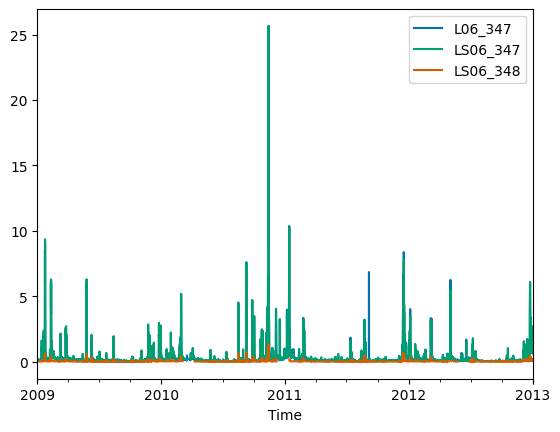

In [124]:
data.plot()

We have to much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [125]:
data[pd.Timestamp("2012-01-01 09:00") : pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


But, for convenience, indexing a time series also works with strings:

In [126]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [127]:
data.loc["2013"]

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Normally you would expect this to access a column named '2013', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

In [128]:
data["2012-01":"2012-03"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-03-31 09:00:00,0.104917,0.125000,0.012417
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data starting from 2012</li>
</ul>
</div>

In [129]:
data[data.index.year >= 2012]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January for all different years</li>
</ul>
</div>

In [130]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January, February and March for all different years</li>
</ul>
</div>

In [131]:
data[data.index.month.isin([1, 2, 3])]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all 'daytime' data (between 8h and 20h) for all days</li>
</ul>
</div>

In [132]:
data[(data.index.hour >= 8) & (data.index.hour <= 20)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
...,...,...,...
2012-12-31 18:00:00,0.617333,0.617333,0.060583
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583


## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [133]:
data.resample("D").mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>with older versions of pandas, <code>data.resample('D').mean()</code> was expressed as <code>data.resample('D', how='mean')</code>.</li>
</ul>
</div>

Other mathematical methods can also be specified:

In [134]:
data.resample("D").max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>
    The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases <br><br>
    These strings can also be combined with numbers, eg `'10D'`...
</div>



<AxesSubplot: xlabel='Time'>

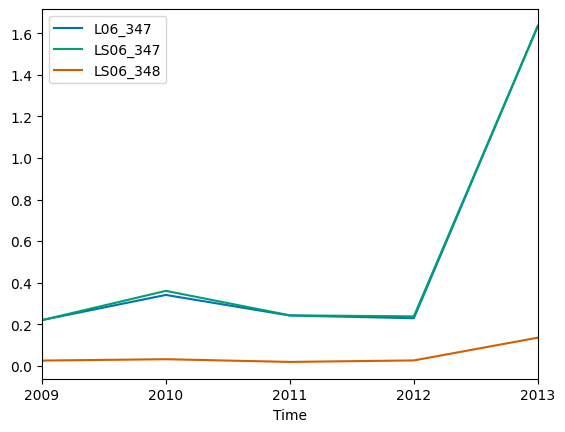

In [135]:
data.resample("A").mean().plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly standard deviation of the columns</li>
</ul>
</div>

array([<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>,
       <AxesSubplot: xlabel='Time'>], dtype=object)

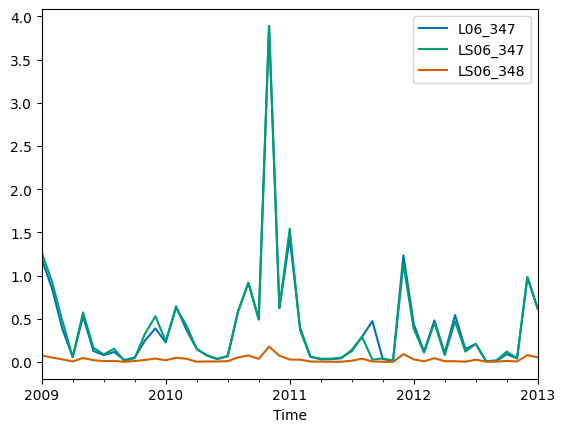

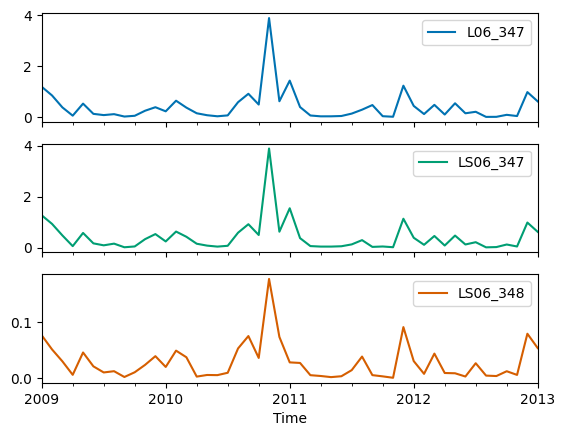

In [136]:
data.resample("M").std().plot()
data.resample("M").std().plot(subplots=True)

<div class="alert alert-success">

<b>EXERCISE</b>:
 <ul>
  <li>plot the monthly mean and median values for the years 2011-2012 for 'L06_347'<br><br></li>
 </ul>
     <b>Note** </b> <br>You can create a new figure with  `fig, ax = plt.subplots()`
 and add each of the plots to the created `ax` object (see documentation of pandas plot function)
</div>

<AxesSubplot: xlabel='Time'>

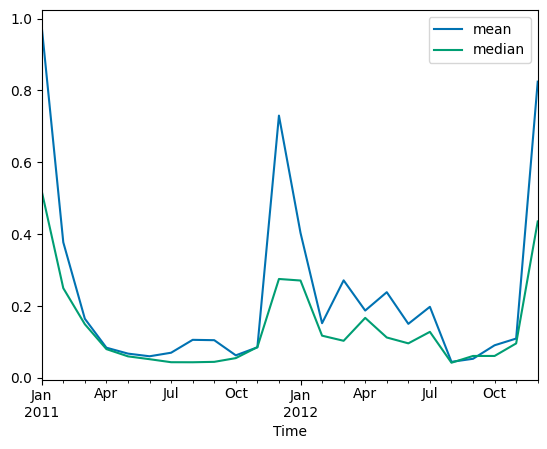

In [137]:
data.loc["2011":"2012", "L06_347"].resample("M").agg(["mean", "median"]).plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly mininum and maximum daily average value of the 'LS06_348' column</li>
</ul>
</div>

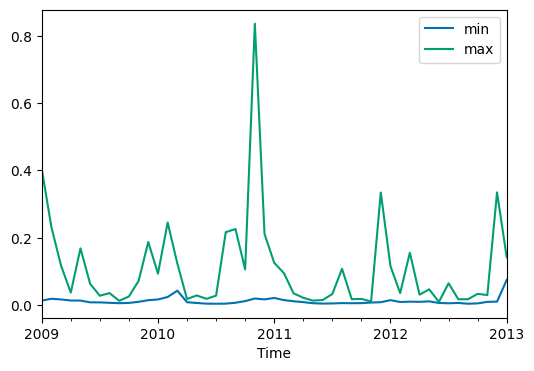

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

data["LS06_348"].resample("D").mean().resample("M").min().plot(ax=ax, label="min")
data["LS06_348"].resample("D").mean().resample("M").max().plot(ax=ax, label="max")

plt.legend()
plt.show()

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>make a bar plot of the mean of the stations in year of 2013 (Remark: create a `fig, ax = plt.subplots()` object and add the plot to the created ax</li>
</ul>

</div>

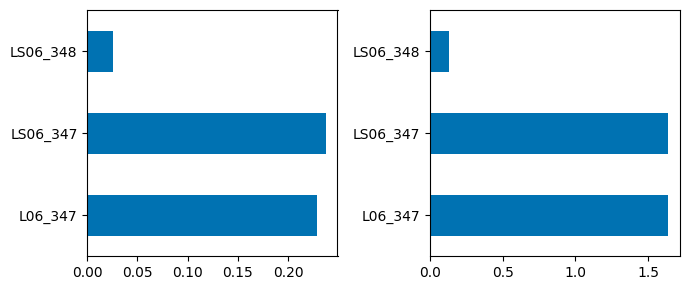

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

data.loc["2012"].mean().plot(kind="barh", ax=ax1)
data.loc["2013"].mean().plot(kind="barh", ax=ax2)

fig.tight_layout()

## Combining datasets Part I - concat

Combining data is essential functionality in a data analysis workflow. 

Data is distributed in multiple files, different information needs to be merged, new data is calculated, .. and needs to be added together. Pandas provides various facilities for easily combining together Series and DataFrame objects

In [140]:
# series
population = pd.Series(
    {
        "Germany": 81.3,
        "Belgium": 11.3,
        "France": 64.3,
        "United Kingdom": 64.9,
        "Netherlands": 16.9,
    }
)

# dataframe
data = {
    "country": ["Belgium", "France", "Germany", "Netherlands", "United Kingdom"],
    "population": [11.3, 64.3, 81.3, 16.9, 64.9],
    "area": [30510, 671308, 357050, 41526, 244820],
    "capital": ["Brussels", "Paris", "Berlin", "Amsterdam", "London"],
}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# Adding columns

As we already have seen before, adding a single column is very easy:

In [141]:
pop_density = countries["population"] * 1e6 / countries["area"]

In [142]:
pop_density

0    370.370370
1     95.783158
2    227.699202
3    406.973944
4    265.092721
dtype: float64

In [143]:
countries["pop_density"] = pop_density

In [144]:
countries

,country,population,area,capital,pop_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721


Adding multiple columns at once is also possible. For example, the following method gives us a DataFrame of two columns:

In [145]:
countries["country"].str.split(" ", expand=True)

,0,1
0,Belgium,None
1,France,None
2,Germany,None
3,Netherlands,None
4,United,Kingdom


We can add both at once to the dataframe:

In [146]:
countries[["first", "last"]] = countries["country"].str.split(" ", expand=True)

In [147]:
countries

,country,population,area,capital,pop_density,first,last
0,Belgium,11.3,30510,Brussels,370.370370,Belgium,None
1,France,64.3,671308,Paris,95.783158,France,None
2,Germany,81.3,357050,Berlin,227.699202,Germany,None
3,Netherlands,16.9,41526,Amsterdam,406.973944,Netherlands,None
4,United Kingdom,64.9,244820,London,265.092721,United,Kingdom


Delete the new columns to revert the change

In [148]:
countries.drop(["first", "last"], axis=1, inplace=True)
countries

,country,population,area,capital,pop_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721


# Concatenating data

The ``pd.concat`` function does all of the heavy lifting of combining data in different ways.

``pd.concat`` takes a list or dict of Series/DataFrame objects and concatenates them in a certain direction (`axis`) with some configurable handling of “what to do with the other axes”.


## Combining rows - ``pd.concat``

![](img/schema-concat0.svg)

Assume we have some similar data as in `countries`, but for a set of different countries:

In [149]:
data = {
    "country": [
        "Nigeria",
        "Rwanda",
        "Egypt",
        "Morocco",
    ],
    "population": [182.2, 11.3, 94.3, 34.4],
    "area": [923768, 26338, 1010408, 710850],
    "capital": ["Abuja", "Kigali", "Cairo", "Rabat"],
}
countries_africa = pd.DataFrame(data)
countries_africa

,country,population,area,capital
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


We now want to combine the rows of both datasets:

In [150]:
pd.concat([countries, countries_africa])

,country,population,area,capital,pop_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721
0,Nigeria,182.2,923768,Abuja,NaN
1,Rwanda,11.3,26338,Kigali,NaN
2,Egypt,94.3,1010408,Cairo,NaN
3,Morocco,34.4,710850,Rabat,NaN


If we don't want the index to be preserved:

In [151]:
pd.concat([countries, countries_africa], ignore_index=True)

,country,population,area,capital,pop_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721
5,Nigeria,182.2,923768,Abuja,NaN
6,Rwanda,11.3,26338,Kigali,NaN
7,Egypt,94.3,1010408,Cairo,NaN
8,Morocco,34.4,710850,Rabat,NaN


When the two dataframes don't have the same set of columns, by default missing values get introduced:

In [152]:
pd.concat([countries, countries_africa[["country", "capital"]]], ignore_index=True)

,country,population,area,capital,pop_density
0,Belgium,11.3,30510.0,Brussels,370.370370
1,France,64.3,671308.0,Paris,95.783158
2,Germany,81.3,357050.0,Berlin,227.699202
3,Netherlands,16.9,41526.0,Amsterdam,406.973944
4,United Kingdom,64.9,244820.0,London,265.092721
5,Nigeria,NaN,NaN,Abuja,NaN
6,Rwanda,NaN,NaN,Kigali,NaN
7,Egypt,NaN,NaN,Cairo,NaN
8,Morocco,NaN,NaN,Rabat,NaN


We can also pass a dictionary of objects instead of a list of objects. Now the keys of the dictionary are preserved as an additional index level:

In [153]:
pd.concat({"europe": countries, "africa": countries_africa})

country  population     area    capital  pop_density
europe 0         Belgium        11.3    30510   Brussels   370.370370
       1          France        64.3   671308      Paris    95.783158
       2         Germany        81.3   357050     Berlin   227.699202
       3     Netherlands        16.9    41526  Amsterdam   406.973944
       4  United Kingdom        64.9   244820     London   265.092721
africa 0         Nigeria       182.2   923768      Abuja          NaN
       1          Rwanda        11.3    26338     Kigali          NaN
       2           Egypt        94.3  1010408      Cairo          NaN
       3         Morocco        34.4   710850      Rabat          NaN

## Combining columns  - ``pd.concat`` with ``axis=1``

![](img/schema-concat1.svg)

Assume we have another DataFrame for the same countries, but with some additional statistics:

In [154]:
data = {
    "country": ["Belgium", "France", "Netherlands"],
    "GDP": [496477, 2650823, 820726],
    "area": [8.0, 9.9, 5.7],
}
country_economics = pd.DataFrame(data).set_index("country")
country_economics

,GDP,area
country,,
Belgium,496477,8.0
France,2650823,9.9
Netherlands,820726,5.7


In [155]:
pd.concat([countries, country_economics], axis=1)

,country,population,area,capital,pop_density,GDP,area
0,Belgium,11.3,30510.0,Brussels,370.370370,NaN,NaN
1,France,64.3,671308.0,Paris,95.783158,NaN,NaN
2,Germany,81.3,357050.0,Berlin,227.699202,NaN,NaN
3,Netherlands,16.9,41526.0,Amsterdam,406.973944,NaN,NaN
4,United Kingdom,64.9,244820.0,London,265.092721,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,496477.0,8.0
France,NaN,NaN,NaN,NaN,NaN,2650823.0,9.9
Netherlands,NaN,NaN,NaN,NaN,NaN,820726.0,5.7


`pd.concat` matches the different objects based on the index:

In [156]:
countries2 = countries.set_index("country")

In [157]:
countries2

,population,area,capital,pop_density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


In [158]:
df = pd.concat([countries2, country_economics], axis=1)
df

,population,area,capital,pop_density,GDP,area
country,,,,,,
Belgium,11.3,30510,Brussels,370.370370,496477.0,8.0
France,64.3,671308,Paris,95.783158,2650823.0,9.9
Germany,81.3,357050,Berlin,227.699202,NaN,NaN
Netherlands,16.9,41526,Amsterdam,406.973944,820726.0,5.7
United Kingdom,64.9,244820,London,265.092721,NaN,NaN


In [159]:
df["area"]

,area,area
country,,
Belgium,30510,8.0
France,671308,9.9
Germany,357050,NaN
Netherlands,41526,5.7
United Kingdom,244820,NaN


# Joining data with `pd.merge`

Using `pd.concat` above, we combined datasets that had the same columns or the same index values. But, another typical case if where you want to add information of second dataframe to a first one based on one of the columns. That can be done with [`pd.merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Let's look again at the titanic passenger data, but taking a small subset of it to make the example easier to grasp:

In [160]:
data = {
    "country": [
        "Belgium",
        "France",
        "Germany",
        "Netherlands",
        "United Kingdom",
        "Australia",
    ],
    "population": [11.3, 64.3, 81.3, 16.9, 64.9, 24.4],
    "area": [30510, 671308, 357050, 41526, 244820, 7692024],
    "capital": ["Brussels", "Paris", "Berlin", "Amsterdam", "London", "Canberra"],
    "hemisphere": ["North", "North", "North", "North", "North", "South"],
}
countries = pd.DataFrame(data)
countries

,country,population,area,capital,hemisphere
0,Belgium,11.3,30510,Brussels,North
1,France,64.3,671308,Paris,North
2,Germany,81.3,357050,Berlin,North
3,Netherlands,16.9,41526,Amsterdam,North
4,United Kingdom,64.9,244820,London,North
5,Australia,24.4,7692024,Canberra,South


In [161]:
data = {
    "city": ["Paris", "Lyon", "Lille", "Berlin", "Munich", "Sydney"],
    "country": ["France", "France", "France", "Germany", "Germany", "Australia"],
}
cities = pd.DataFrame(data)
cities

,city,country
0,Paris,France
1,Lyon,France
2,Lille,France
3,Berlin,Germany
4,Munich,Germany
5,Sydney,Australia


Let's say we want to know in what hemisphere is each city

In [162]:
pd.merge(cities, countries, on="country", how="left")

,city,country,population,area,capital,hemisphere
0,Paris,France,64.3,671308,Paris,North
1,Lyon,France,64.3,671308,Paris,North
2,Lille,France,64.3,671308,Paris,North
3,Berlin,Germany,81.3,357050,Berlin,North
4,Munich,Germany,81.3,357050,Berlin,North
5,Sydney,Australia,24.4,7692024,Canberra,South


In [163]:
pd.merge(cities, countries[["country", "hemisphere"]], on="country", how="left")

,city,country,hemisphere
0,Paris,France,North
1,Lyon,France,North
2,Lille,France,North
3,Berlin,Germany,North
4,Munich,Germany,North
5,Sydney,Australia,South


In this case we use `how='left` (a "left join") because we wanted to keep the original rows of `cities` and only add matching values from `countries` to it. Other options are 'inner', 'outer' and 'right' (see the [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra) for more on this).

## "Group by" operations

### Some 'theory': the groupby operation (split-apply-combine)

In [164]:
df = pd.DataFrame(
    {
        "key": ["A", "B", "C", "A", "B", "C", "A", "B", "C"],
        "data": [0, 5, 10, 5, 10, 15, 10, 15, 20],
    }
)
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [165]:
df["data"].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [166]:
print("A", df[df["key"] == "A"]["data"].sum())
print("B", df[df["key"] == "B"]["data"].sum())
print("C", df[df["key"] == "C"]["data"].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [167]:
df.groupby("key").sum()

,data
key,
A,15
B,30
C,45


In [168]:
df.groupby("key").aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [169]:
df.groupby("key")["data"].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Some more theory

## Specifying the grouper

In the previous example and exercises, we always grouped by a single column by passing its name. But, a column name is not the only value you can pass as the grouper in `df.groupby(grouper)`. Other possibilities for `grouper` are:

- a list of strings (to group by multiple columns)
- a Series (similar to a string indicating a column in df) or array
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex

In [170]:
df.groupby(df["data"] < 18).mean()

C:\Users\pasqu\AppData\Local\Temp\ipykernel_1404\876879094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['data'] < 18).mean()


,data
data,
False,20.00
True,8.75


## The size of groups - value counts

Oftentimes you want to know how many elements there are in a certain group (or in other words: the number of occurences of the different values from a column).

To get the size of the groups, we can use `size`:

In [171]:
df.groupby("key").size()

key
A    3
B    3
C    3
dtype: int64

Another way to obtain such counts, is to use the Series `value_counts` method:

In [172]:
df["key"].value_counts()

A    3
B    3
C    3
Name: key, dtype: int64

## Reshaping data

### Pivoting data

People who know Excel, probably know the **Pivot** functionality:

![](img/pivot_excel.png)

The data of the table:

In [173]:
excelample = pd.DataFrame(
    {
        "Month": [
            "January",
            "January",
            "January",
            "January",
            "February",
            "February",
            "February",
            "February",
            "March",
            "March",
            "March",
            "March",
        ],
        "Category": [
            "Transportation",
            "Grocery",
            "Household",
            "Entertainment",
            "Transportation",
            "Grocery",
            "Household",
            "Entertainment",
            "Transportation",
            "Grocery",
            "Household",
            "Entertainment",
        ],
        "Amount": [
            74.0,
            235.0,
            175.0,
            100.0,
            115.0,
            240.0,
            225.0,
            125.0,
            90.0,
            260.0,
            200.0,
            120.0,
        ],
    }
)

In [174]:
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [175]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


Interested in *Grand totals*?

In [176]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [177]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

## Pivot is just reordering your data:

Small subsample of the titanic dataset:

In [178]:
df = pd.DataFrame(
    {
        "Fare": [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
        "Pclass": [3, 1, 1, 2, 3, 2],
        "Sex": ["male", "female", "male", "female", "female", "male"],
        "Survived": [0, 1, 0, 1, 0, 1],
    }
)

In [179]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [180]:
df.pivot(index="Pclass", columns="Sex", values="Fare")

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [181]:
df.pivot(index="Pclass", columns="Sex", values="Survived")

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>**Pivot** is purely restructering: a single value for each index/column combination is required.</li>
</ul>
</div>

# Pivot tables - aggregating while pivoting

In [182]:
df.pivot_table(index="Sex", columns="Pclass", values="Fare")

Pclass,1,2,3
Sex,,,
female,71.2833,30.0708,7.8542
male,51.8625,13.0000,7.2500


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>By default, `pivot_table` takes the **mean** of all values that would end up into one cell. However, you can also specify other aggregation functions using the `aggfunc` keyword.</li>
</ul>
</div>

In [183]:
df.pivot_table(index="Sex", columns="Pclass", values="Fare", aggfunc="max")

Pclass,1,2,3
Sex,,,
female,71.2833,30.0708,7.8542
male,51.8625,13.0000,7.2500


In [184]:
df.pivot_table(index="Sex", columns="Pclass", values="Fare", aggfunc="count")

Pclass,1,2,3
Sex,,,
female,1,1,1
male,1,1,1


# Reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

Indeed... 
<img src="img/schema-stack.svg" width=50%>

Before we speak about `hierarchical index`, first check it in practice on the following dummy example:

In [185]:
df = pd.DataFrame(
    {"A": ["one", "one", "two", "two"], "B": ["a", "b", "a", "b"], "C": range(4)}
)
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [186]:
df = df.set_index(["A", "B"])  # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [187]:
result = df["C"].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [188]:
df = result.stack().reset_index(name="C")
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>**stack**: make your data *longer* and *smaller* </li>
  <li>**unstack**: make your data *shorter* and *wider* </li>
</ul>
</div>

## To learn more on Pandas and scientific Python in general

   - https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/tree/master/notebooks/